In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
 

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#%matplotlib inline




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


# Load v2

In [3]:
sc.settings.figdir = "fig3"

In [12]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_lesional11.h5ad'
adata_lesional=sc.read_h5ad(PATH)
adata_lesional.var

highly_variable_nbatches  highly_variable
gene_symbol                                           
TSPAN6                           84.0            False
TNMD                            246.0             True
DPM1                             28.0            False
SCYL3                           126.0             True
C1orf112                          NaN            False
...                               ...              ...
CRIPAK                          106.0             True
AL109627.1                       39.0            False
AC024558.2                       99.0            False
AL512357.2                        0.0            False
AL138899.3                        8.0            False

[36601 rows x 2 columns]

# Fig 3b

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


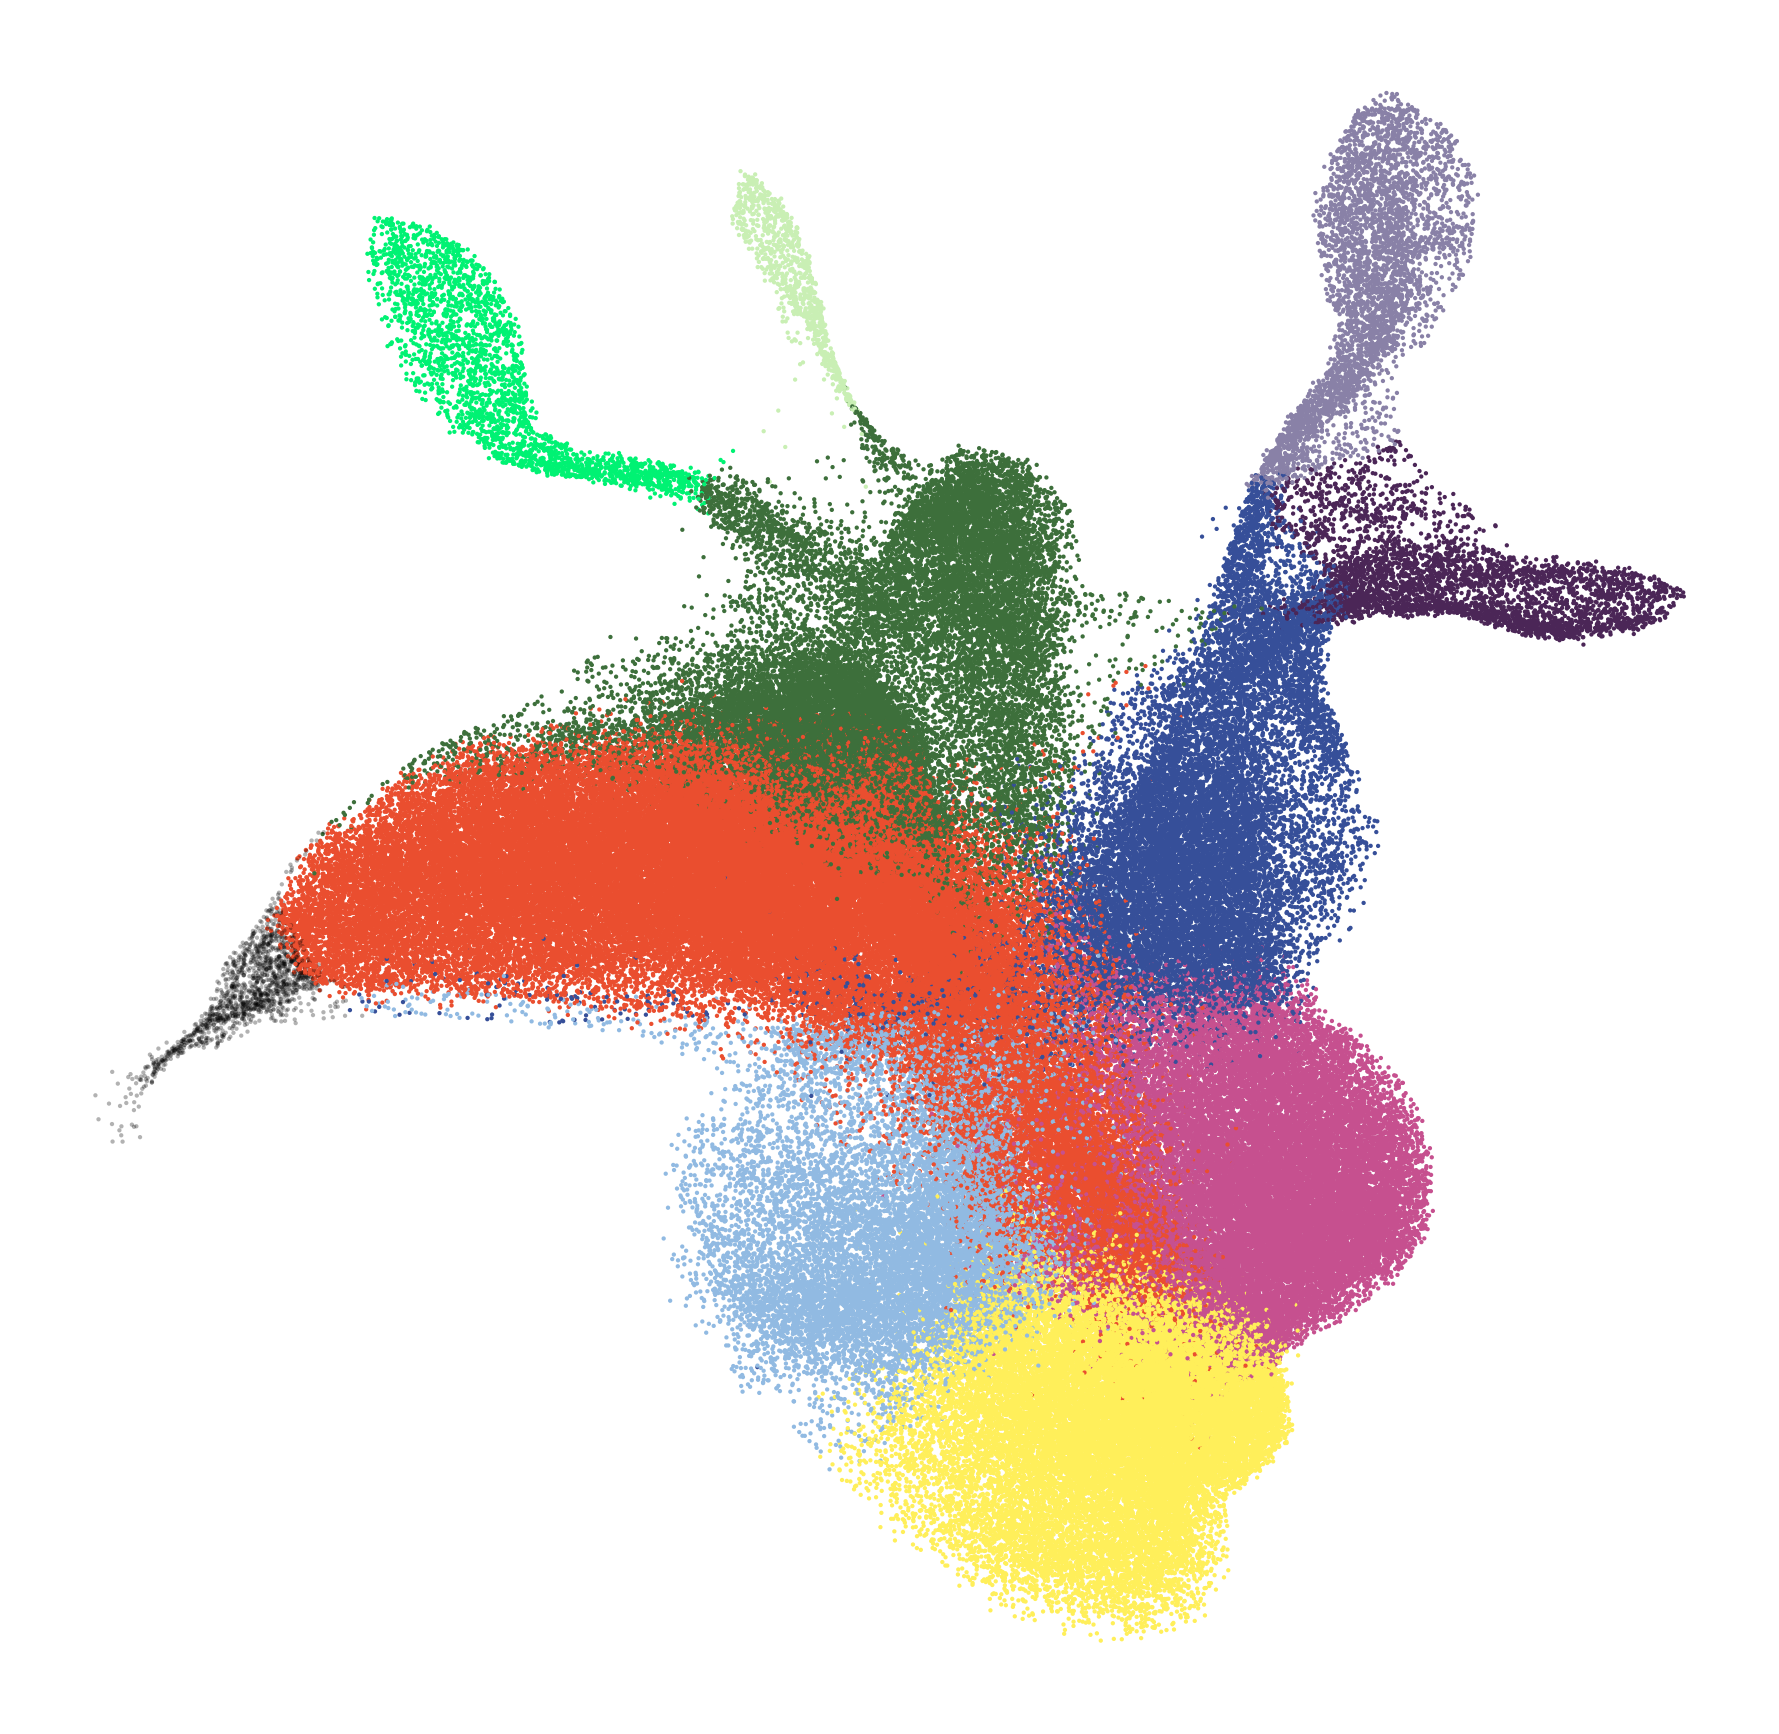

In [8]:
custom_colors = {
     'F1: Secretory': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
        'F2: Bridge': '#364f99',
            'F2/3: Bridge': '#364f99',


    'F2: Universal': '#91bae2',
       'F2: Universal (reticular)'  : '#91bae2',

    'F3: FRC-like': '#c6508f',
    'F3: CCL19':'#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: DPEP1': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: SFRP4+': '#8981a7',

    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
    'F_fascia': "#0000004D",
    
          "UNCERTAIN_CELLTYPE"   : np.array([234 / 255, 78 / 255, 47 / 255, 1.0])
                               }


try:
    adata_lesional.uns["lvl3_annotation_pred_colors"] = [custom_colors[cat] for cat in adata_lesional.obs["lvl3_annotation_pred"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")
                                                                            
sc.pl.umap(
    adata_lesional,
    color='lvl3_annotation_pred',
    show=True,
    frameon=False,
    legend_loc=None, #"on data",
    legend_fontsize=1,
    s=15,
    title='',
    legend_fontoutline=2,
    save='_fig3b_uncertainty_umap.pdf'
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


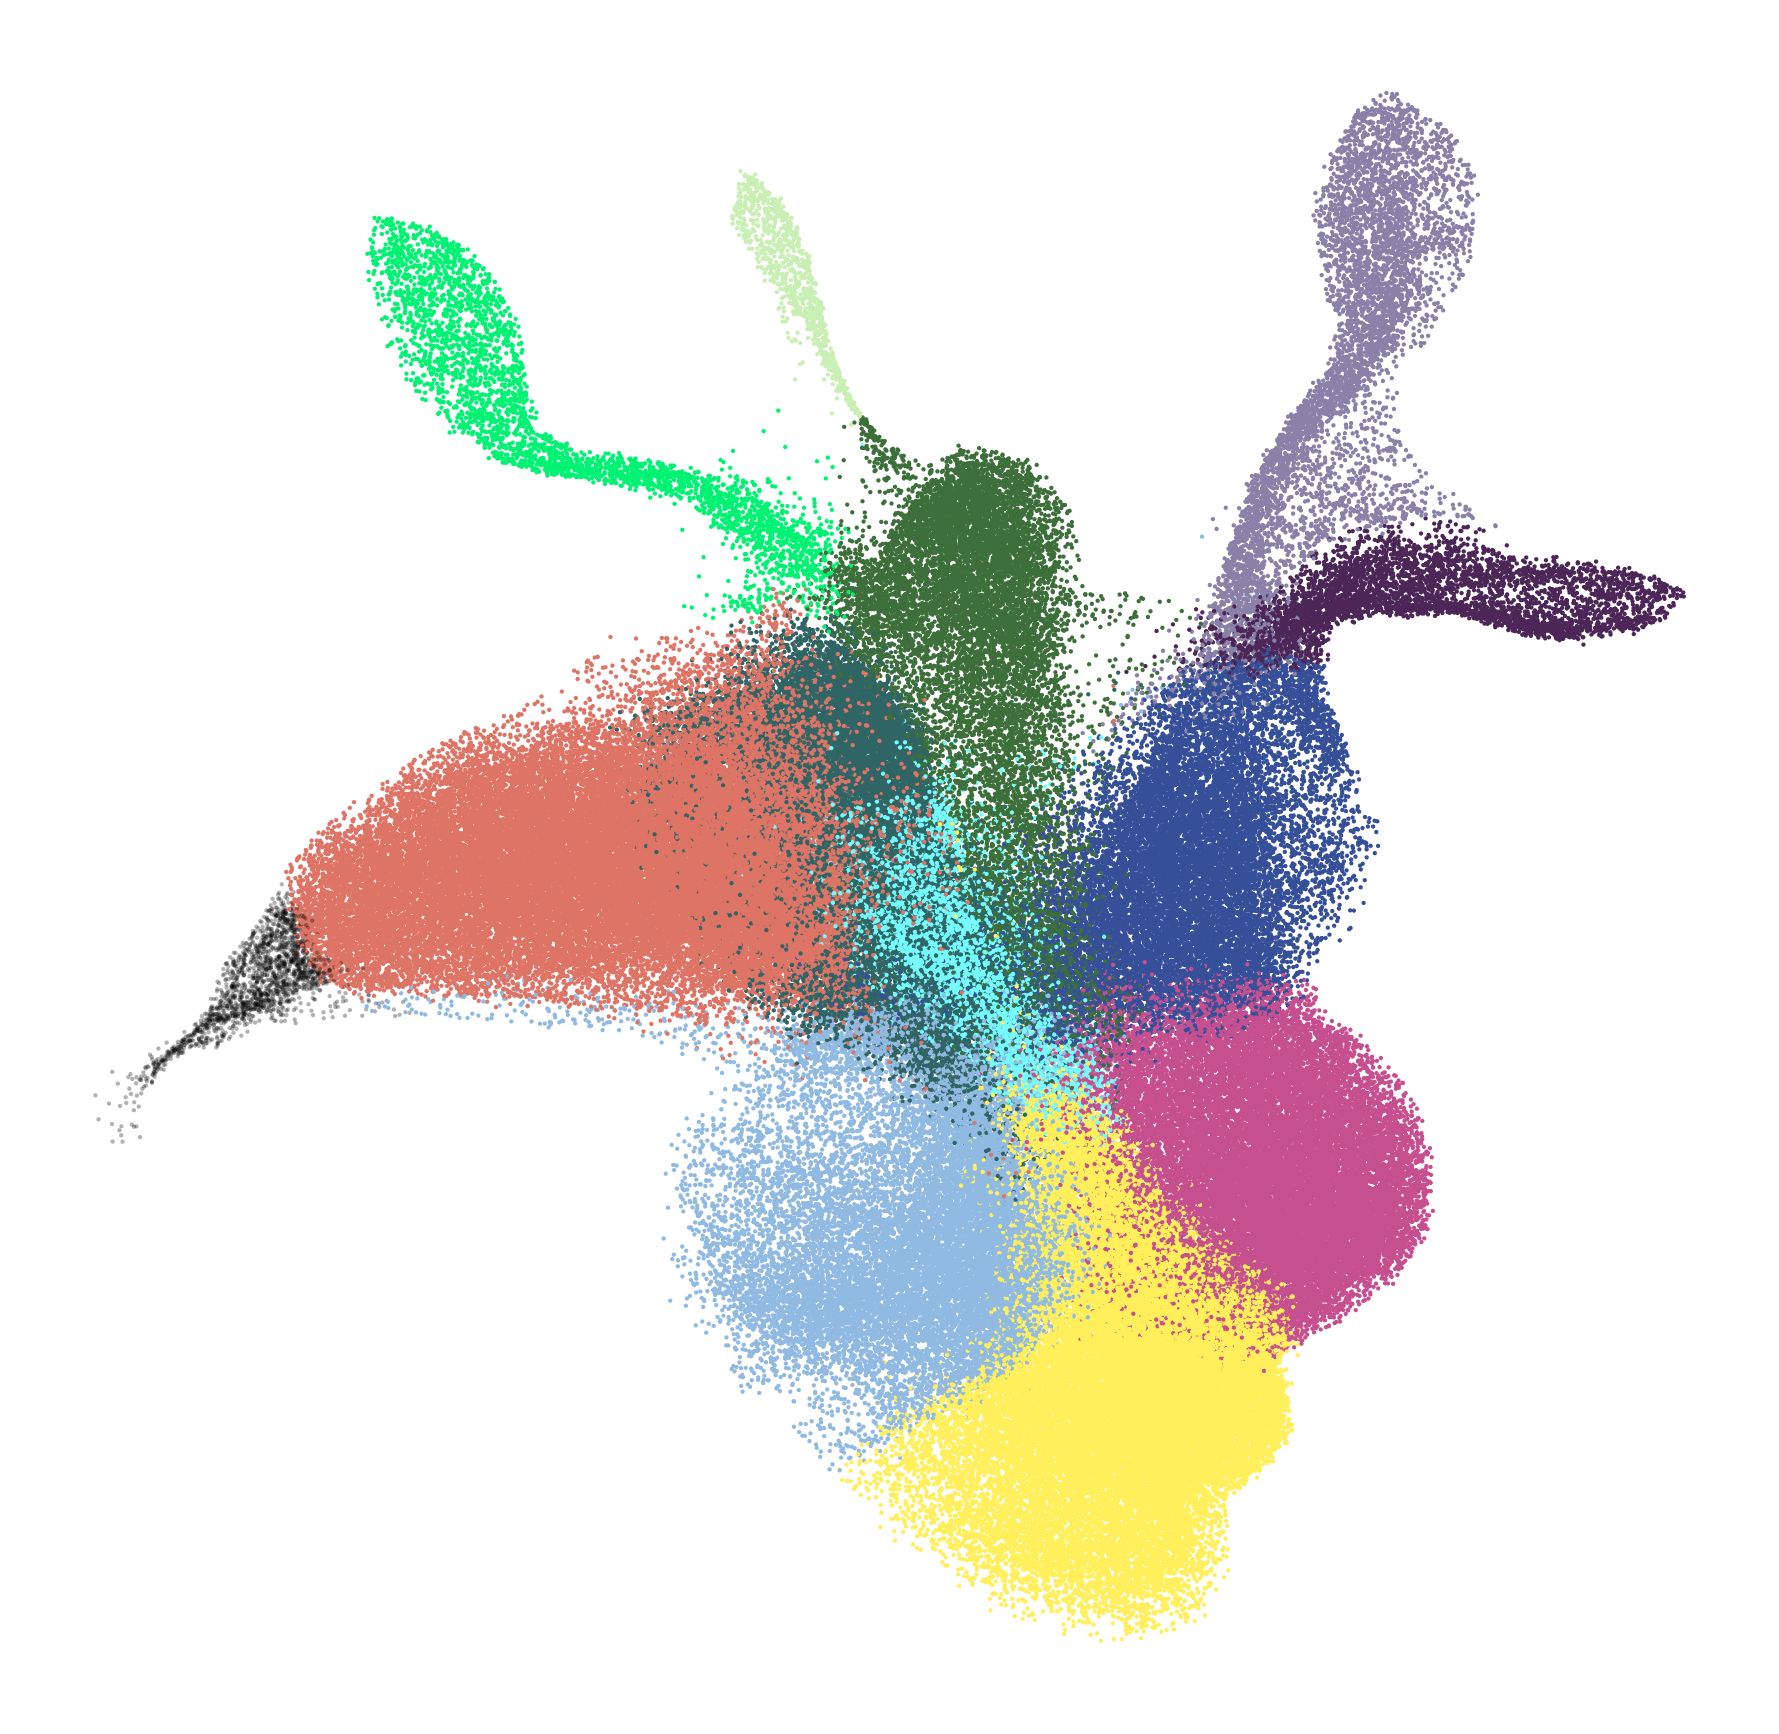

In [9]:
sc.pl.umap(
    adata_lesional,
    color='test13',
    show=True,
    frameon=False,
    legend_loc=None, #"on data",
    legend_fontsize=1,
    s=15,
    title='',
    legend_fontoutline=2,
    save='_fig3b_uncertainty_umap_relabelled.pdf'
)

In [10]:
ORDER = [ 'Erythema migrans',
          'Granuloma annulare',
          'Sarcoidosis',
         'Drug reaction: lichenoid',
 'Drug reaction: DRESS',
          'Acral melanoma',
                   'Morphoea (pansclerotic)', 'Systemic sclerosis',


 'Basal cell carcinoma',

 'Acne',
 'Non-keloid scar',




 'Neurofibroma',

 'Squamous cell carcinoma', "Dupuytren contracture",
 'Lupus (DLE)',
 'Lupus (SCLE)',
 'Alopecia areata',
 'Prurigo nodularis',
 'Hidradenitis suppurativa',
          'Keloid scar',
 'Cutaneous melanoma',
 'Psoriasis',
 'Eczema']

In [14]:
adata_lesional_f3=adata_lesional[adata_lesional.obs["test13"].str.startswith("F3")].copy()


# fig 3c

In [15]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)





In [16]:
LESIONAL_GENES_VSHORT5 = {
    "F3": [
        "CCL19",
        "CD74",
        "CH25H",
        "ADAMDEC1",
        "CXCL9"
    ],
    "F1": [
        "COL18A1",
        "COL23A1",
        "COL13A1",
        "NKD2",
        "CRABP1",
        "TNFRSF21",
        "CXCL1"
    ],
    "F1+F6": [
        "WNT5A",
        "COL7A1"
    ],
    "F6": [
        "CXCL8",
        "CXCL5",
        "CXCL6",
        "CXCL13",
        "IL11",
        "IL24",
        "MMP1",
        "MMP3",
        "IL7R",
        "INHBA",
        "CSF3",
        "TDO2",
        "WWC1",
        "CHI3L1",
        "CCL5",
        "CCL11",
        "FAM167A",
        "HIF1A"
    ],
    "F6+F7": [
        "WNT2",
        "COL10A1",
        "LAMP5"
    ],
    "F7": [
        "NRG1",
        "OGN"
    ],
    "F6-F8": [
        "ACTA2",
        "TAGLN",
        "ASPN",
        "COMP",
        "COL11A1",
        "KIF26B",
        "ZNF469",
        "RUNX2",
        "SULF1",
        "ADAM12",
        "ADAM19",
        "COL8A1",
        "LRRC15",
        "CREB3L1",
        "CTHRC1",
        "CCN4",
        "FABP5",
        "CDH2"
    ],
    "F7+F8": [
        "C1QTNF3",
        "CADM1",
        "LRRC17",
        "PIEZO2",
        "SFRP4",
        "KCNMA1"
    ],
    "F8": [
        "ACAN",
        "SCX",
        "THBS4",
        "ITGA10",
        "FGF18",
        "PRG4",
        "CRTAC1"
    ]
}

In [17]:
import pickle

# Define your file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(LESIONAL_GENES_VSHORT5, file)

print(f"Dictionary saved to {file_path}")





Dictionary saved to /nfs/team298/ls34/fb_dict_lesional.pkl


In [18]:
adata_lesional3=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F3"))|
                            (adata_lesional.obs["test13"].str.startswith("F1"))|
                            (adata_lesional.obs["test13"].str.startswith("F6"))|
                              (adata_lesional.obs["test13"].str.startswith("F7"))|
                                  (adata_lesional.obs["test13"].str.startswith("F8"))|
                              (adata_lesional.obs["test13"].str.startswith("F_"))
                             ]




desired_order = ['F3: FRC-like',
    'F1: Superficial',
    'F6: Inflammatory myofibroblast',
    'F7: Myofibroblast',
    'F8: Fascia-like myofibroblast',
    'F_Fascia'
]

adata_lesional3.obs['test13'] = pd.Categorical(
    adata_lesional3.obs['test13'],
    categories=desired_order,
    ordered=True
)



/tmp/ipykernel_8055/3479157417.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_lesional3.obs['test13'] = pd.Categorical(


In [19]:
adata_lesional3.obs["test13"].value_counts()

test13
F8: Fascia-like myofibroblast     38290
F1: Superficial                   36949
F7: Myofibroblast                 25474
F3: FRC-like                      23147
F6: Inflammatory myofibroblast     6157
F_Fascia                           1764
Name: count, dtype: int64

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

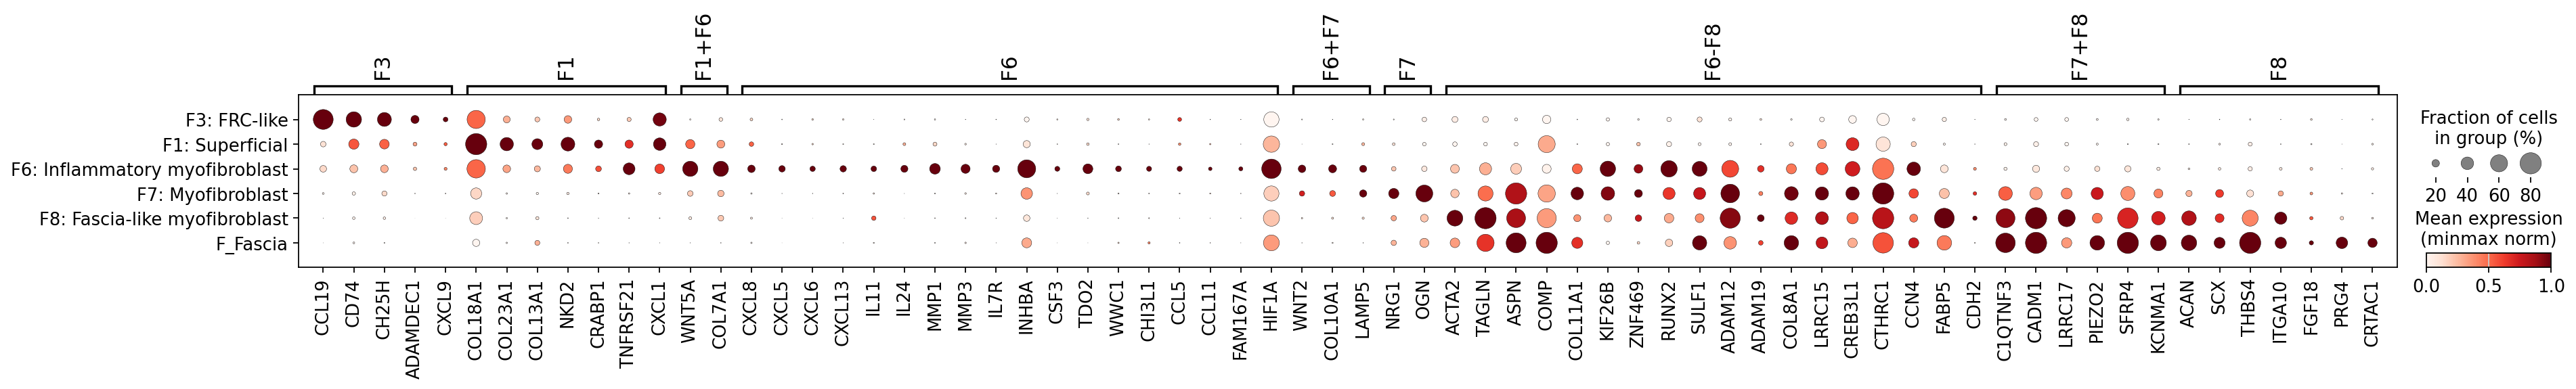

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

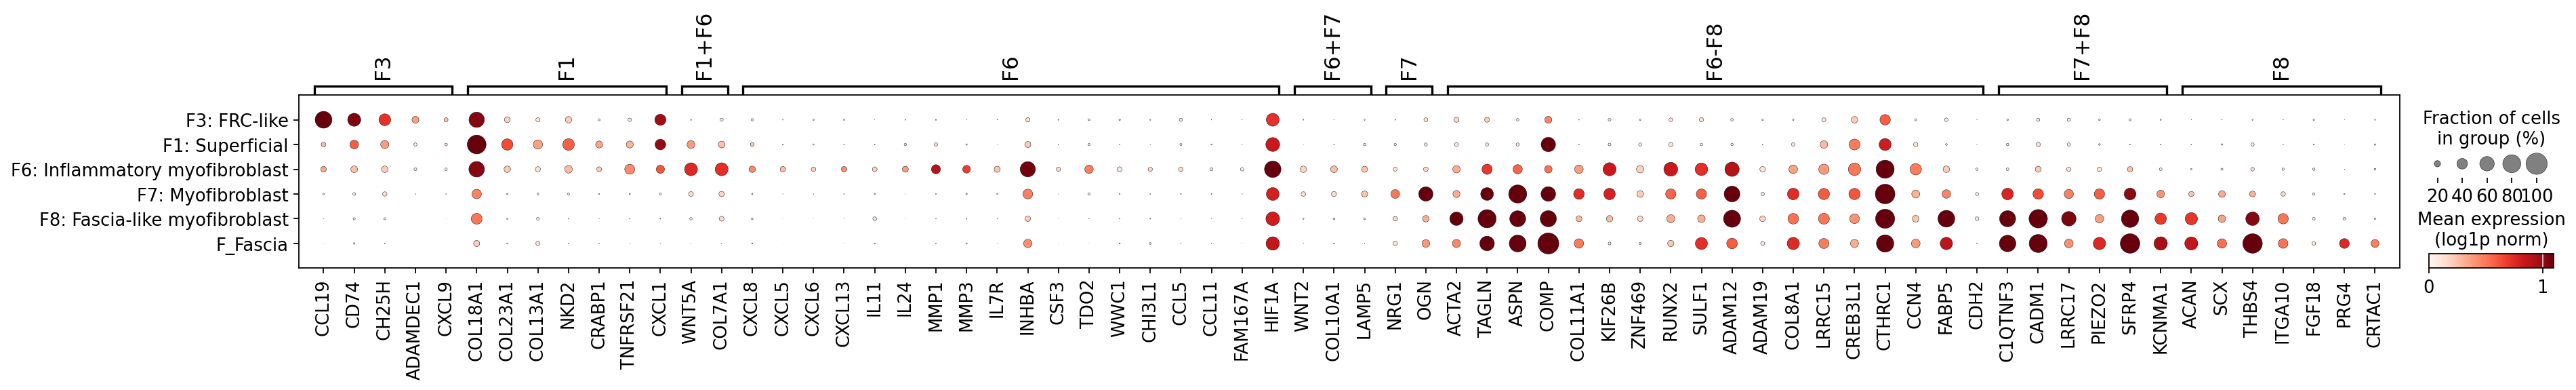

In [20]:
sc.pl.dotplot(
    adata_lesional3,
    LESIONAL_GENES_VSHORT5,
    groupby="test13",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(minmax norm)', 
    dendrogram=False, dot_max=0.8,
    save="fig3c_overalldotplot.pdf"
    
) 


sc.pl.dotplot(
    adata_lesional3,
    LESIONAL_GENES_VSHORT5,
    groupby="test13", 
    vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
) 
 

# fig 3g

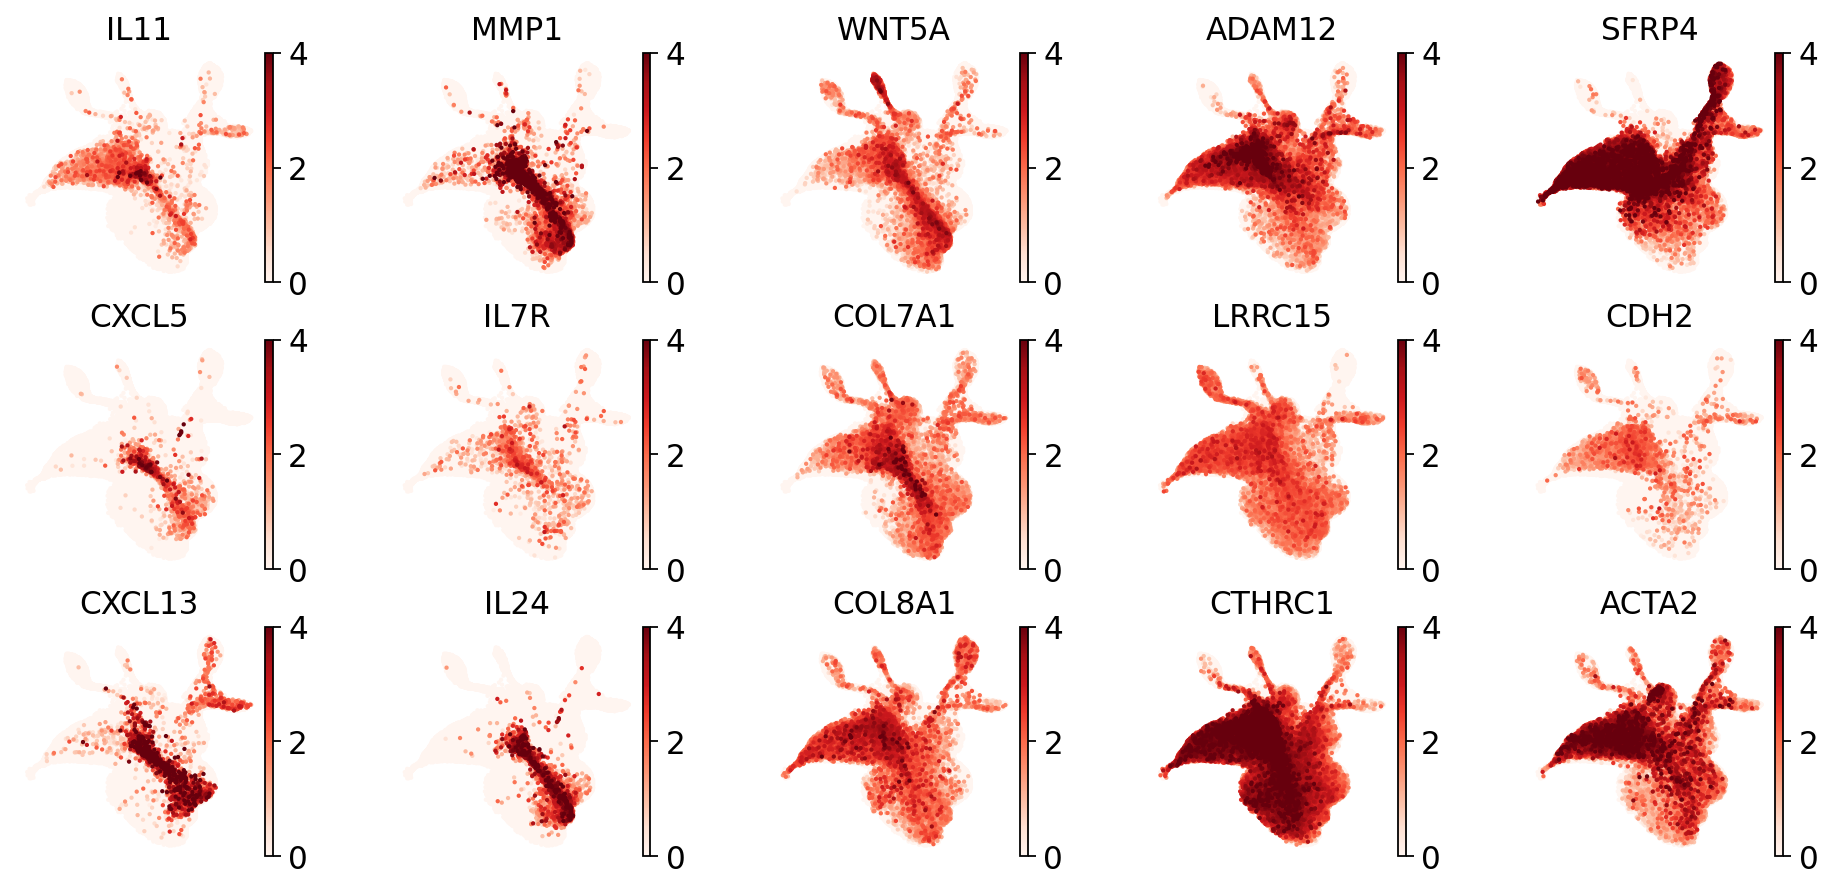

In [21]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(2,2))

sc.pl.umap(
    adata_lesional,
    color=["IL11", "MMP1",  "WNT5A",   "ADAM12",   "SFRP4", 
           "CXCL5", "IL7R", "COL7A1",    "LRRC15", "CDH2",
           "CXCL13", "IL24","COL8A1",  "CTHRC1",   "ACTA2", 
   ],
    s=15,
    legend_loc=None,
    vmax=4,
    ncols=5,
    cmap="Reds",
    save="fig3g_featuremaps.pdf" 
)

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


# fig 3e

In [1]:
import scanpy as sc
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_all.h5ad'
adata=sc.read_h5ad(PATH)
adata.obs["Patient_status"].value_counts()

Patient_status
Healthy                          130934
Psoriasis                         51841
Dupuytren's                       46277
Keloid                            28048
SSc                               27444
Lyme_disease/Erythema migrans     11613
Prurigo nodularis                 11573
Eczema                             8739
Non-keloid scar                    7302
Neurofibroma                       6617
AA                                 5429
BCC                                5231
SCLE                               3382
Sarcoidosis                        2196
Acne                               2051
PSM                                1657
Acral melanoma                     1451
HS                                 1285
DLE                                1108
Drug reaction: irAE                1043
SCC                                 812
Drug reaction: DRESS                675
Granuloma annulare                  381
Cutaneous melanoma                  187
Name: count, dtype: int64

In [2]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)


file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)



In [3]:
adata_f1 = adata[adata.obs['test13'].str.startswith("F1")]


In [4]:
adata_f1.obs['Patient_status'].value_counts()

Patient_status
Healthy                          20639
Psoriasis                        20484
Lyme_disease/Erythema migrans     6029
SSc                               5158
Prurigo nodularis                 5146
Eczema                            1741
Non-keloid scar                   1286
SCLE                              1155
Keloid                            1130
PSM                                719
Drug reaction: irAE                552
BCC                                494
DLE                                475
Acne                               419
Drug reaction: DRESS               224
AA                                 191
Sarcoidosis                        174
Acral melanoma                     146
HS                                 130
Dupuytren's                         32
Cutaneous melanoma                  29
Granuloma annulare                  12
Name: count, dtype: int64

In [5]:
import anndata as ad
adata_healthy = adata_f1[adata_f1.obs['Patient_status']=="Healthy"]
adata_lesional = adata_f1[adata_f1.obs['Patient_status2']!="Nonlesional"]
adata_f1=ad.concat([adata_healthy, adata_lesional], label="Site_status_binary", keys=["Healthy","Lesional"])

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

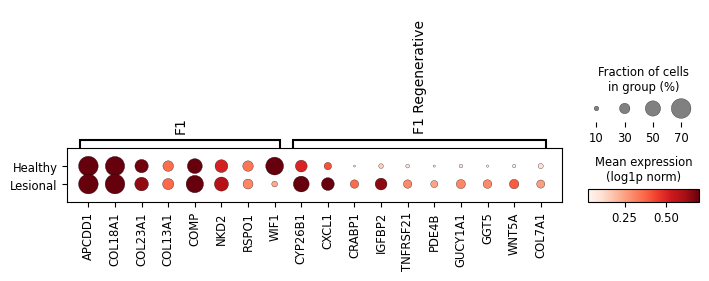

In [6]:
F1_GENES = {    
                          "F1": ['APCDD1',
 'COL18A1',
 'COL23A1',
 'COL13A1',
 'COMP',
 'NKD2',
 'RSPO1',
 'WIF1',],
                          
                          "F1 Regenerative": ['CYP26B1', 'CXCL1',  'CRABP1',  "IGFBP2", 
                                            'TNFRSF21',   
                                          'PDE4B', 
                                           'GUCY1A1',
                                           "GGT5" ,"WNT5A", "COL7A1", #"CCL8",
                                             ],
                         }
                          

sc.pl.dotplot(
    adata_f1,
    F1_GENES,
    groupby="Site_status_binary", 
    vmax=.7,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
    dot_max=.7,
    save="fig3e_f1activation.pdf"

) 




In [7]:
adata_f3 = adata[adata.obs['test13'].str.startswith("F3")]
adata_healthy = adata_f3[adata_f3.obs['Patient_status']=="Healthy"]
adata_lesional = adata_f3[adata_f3.obs['Patient_status2']!="Nonlesional"]
adata_f3=ad.concat([adata_healthy, adata_lesional], label="Site_status_binary", keys=["Healthy","Lesional"])

In [8]:
reynolds_short_final["F3"]

['CCL19',
 'CD74',
 'CH25H',
 'TNFSF13B',
 'IL33',
 'IRF8',
 'IL15',
 'VCAM1',
 'HLA-DRA',
 'HLA-DRB1']

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

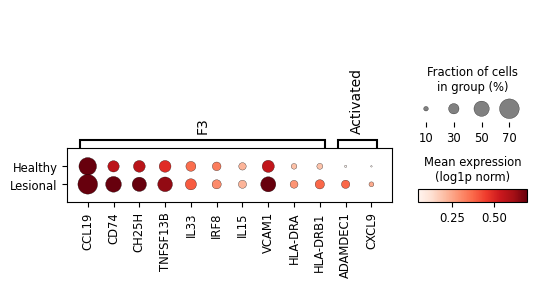

In [9]:
f3_genes = { 'F3': ['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" , 
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1",
 
           ], "Activated": ["ADAMDEC1", "CXCL9", 
                           ]
           }

sc.pl.dotplot(
    adata_f3,
    f3_genes,
    groupby="Site_status_binary", 
    vmax=.7,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
    dot_max=.7,
    save="fig3e_f3activation.pdf"
) 




# fig 3d

In [16]:
sc.settings.figdir = "fig3"

In [17]:
sc.pp.subsample(adata, 0.4)

In [18]:
sc.tl.embedding_density(adata, basis='umap', groupby="Site_status_binary", key_added="Site_status_binary_embeddingdensity",)

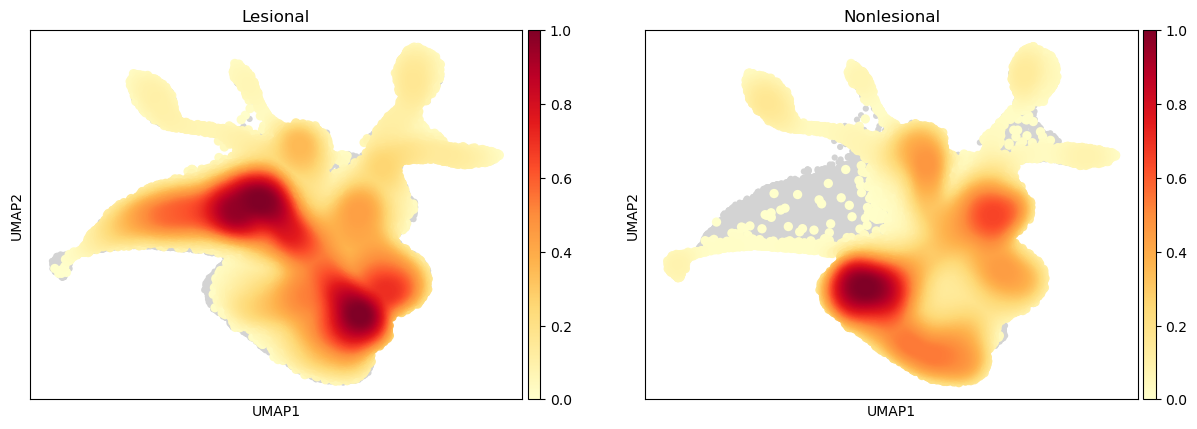

In [19]:
sc.pl.embedding_density(adata=adata, basis='umap', key="Site_status_binary_embeddingdensity",
                       #title=["Density in lesional", "Density in non-lesional"],
                        save="_fig3d_embeddingdensity.pdf"
                       )

# fig 3a 

In [22]:
import scanpy as sc
import numpy as np
F1_NAME="F1: Superficial"
F23_NAME="F2/3: Stroma_PPARG+"



In [24]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_all.h5ad'
adata=sc.read_h5ad(PATH)

In [28]:
 custom_colors = {'F1: Secretory': np.array([1.        , 1.        , 0.89803922, 1.        ]),

    'F2/3: Perivascular': '#364f99',
    'F2: Universal': '#91bae2',
    'F3: FRC-like': '#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
          "UNCERTAIN_CELLTYPE"   : np.array([234 / 255, 78 / 255, 47 / 255, 1.0]),
                           "Nonlesional"   :  np.array([0.83, 0.83, 0.83, 1.0]),  # light grey, full opacity
                       'F1: Secretory': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
        'F2: Bridge': '#364f99',
            'F2/3: Bridge': '#364f99',


    'F2: Universal': '#91bae2',
       'F2: Universal (reticular)'  : '#91bae2',

    'F3: FRC-like': '#c6508f',
    'F3: CCL19':'#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: DPEP1': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: SFRP4+': '#8981a7',

    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
    'F_fascia': "#0000004D",
    
          "UNCERTAIN_CELLTYPE"   : np.array([234 / 255, 78 / 255, 47 / 255, 1.0])

                               }


try:
    adata.uns["lvl3_annotation_pred_colors"] = [custom_colors[cat] for cat in adata.obs["lvl3_annotation_pred"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4, 4
                                                                                 ))


In [29]:
sc.settings.figdir = "fig3"

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


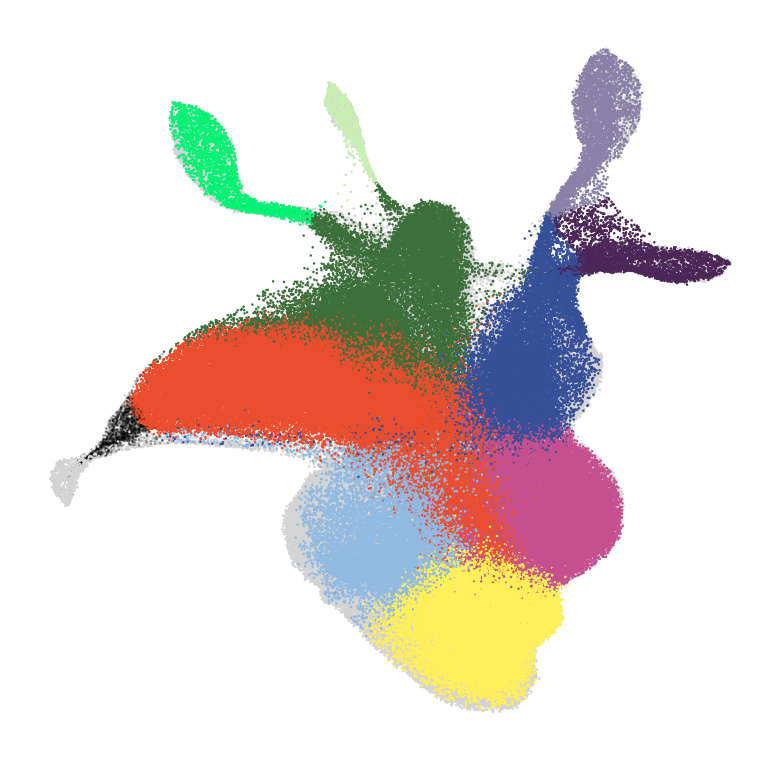

In [30]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(6,6))

sc.pl.umap(
    adata,
    color='lvl3_annotation_pred',
    show=True,
    frameon=False,
    legend_loc=None,
    legend_fontsize=1,
    s=5,
    title='',
    legend_fontoutline=2, save='_fig3a.pdf'
)
